In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('C:/Users/hp/Desktop/code/python/model/data/heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
x=df.drop(['target'],axis=1).values
y=df['target'].values
# print(x.head(),'\n\n\n',y.head())

                            TRAIN TEST SPLIT

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=4)

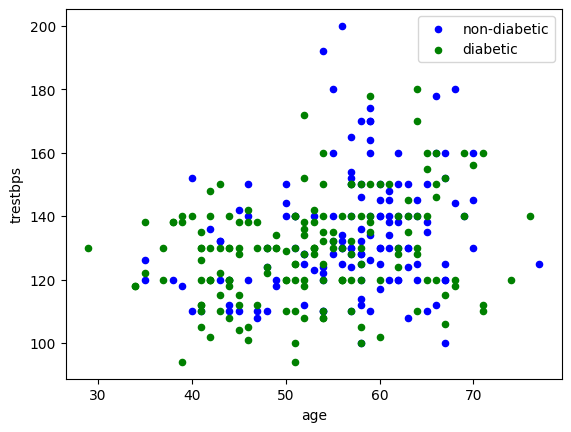

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x[y==0,0],x[y==0,3],c='blue',s=20,label='non-diabetic')
plt.scatter(x[y==1,0],x[y==1,3],c='green',s=20,label='diabetic')
plt.legend()
plt.xlabel('age')
plt.ylabel('trestbps')
plt.show()

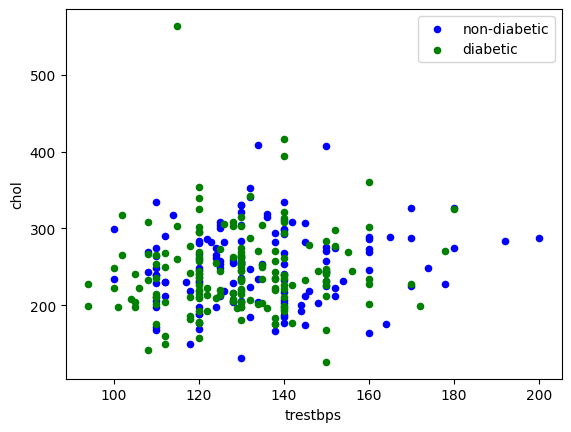

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x[y==0,3],x[y==0,4],c='blue',s=20,label='non-diabetic')
plt.scatter(x[y==1,3],x[y==1,4],c='green',s=20,label='diabetic')
plt.legend()
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.show()

                                   importing and setting logistic

In [9]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
x=df.drop(['target'],axis=1)
y=df['target']

In [10]:
scores=cross_val_score(lr,x,y,cv=7)
scores.mean()

c:\Users\hp\Desktop\code\multiple disease\Multiple-Disease-Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\Desktop\code\multiple disease\Multiple-Disease-Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver 

0.8316973723950467

                           WORKING ON C

In [11]:
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression()
param_list={'C':[0.1,1,2,5,8,12,15,20,25],
            'max_iter':[999,1200,1500]}
model=GridSearchCV(lr,param_grid=param_list,cv=6,scoring='accuracy')
model.fit(x_train,y_train)
print(model.best_params_)
print(model.best_score_)

c:\Users\hp\Desktop\code\multiple disease\Multiple-Disease-Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\Desktop\code\multiple disease\Multiple-Disease-Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver 

{'C': 1, 'max_iter': 999}
0.805589430894309


                                  SETTING THE FINAL MODEL

In [12]:
final_lr=LogisticRegression(C=1,max_iter=1000)
final_lr.fit(x_train,y_train)
x_train_pred=final_lr.predict(x_train)
print('Training acc= ',accuracy_score(x_train_pred,y_train))

y_pred=final_lr.predict(x_test)
print('Test acc= ',accuracy_score(y_test,y_pred))

Training acc=  0.8388429752066116
Test acc=  0.8688524590163934


                           MAKING A PREDICTIVE MODEL

In [13]:
input_data=(42,1,3,148,244,0,0,178,0,0.8,2,2,2)

input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=final_lr.predict(input_data_reshaped)
if(prediction[0]==1):
    print('Positive Heart disease')
else:
    print('negative heart disease')

Positive Heart disease


In [14]:
import pickle

In [15]:
with open('heart.sav','wb') as f:
    pickle.dump(final_lr,f)

In [16]:
with open('heart.sav','rb') as f:
    mp=pickle.load(f)